In [35]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [36]:
import numpy as np
import pandas as pd

In [37]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [38]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [39]:
# Establish DBAPI connection
engine = create_engine('sqlite:///./Resources/hawaii.sqlite')

# reflect an existing database into a new model
base = automap_base()

# reflect the tables
base.prepare(engine, reflect=True)

In [40]:
# We can view all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [41]:
# Save references to each table
measurement = base.classes.measurement
station = base.classes.station

In [42]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

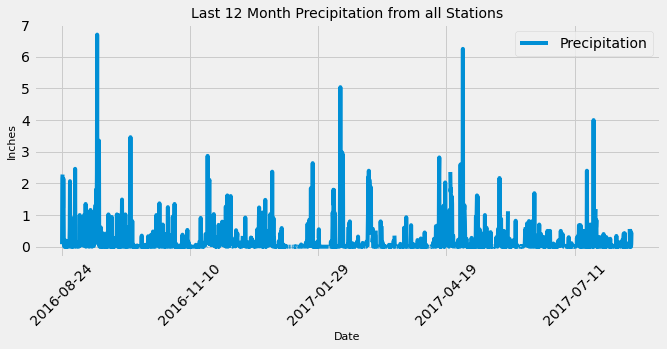

In [55]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
lastDate = session.query(measurement.date).order_by(measurement.date.desc()).first().date

# Calculate the date 1 year ago from the last data point in the database
lastYear = dt.datetime.strptime(lastDate, '%Y-%m-%d') - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
precipScore = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date >= lastYear).\
    order_by(measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
precip_df = pd.DataFrame(precipScore, columns = ['Date', 'Precipitation'])
precip_df.set_index('Date', inplace=True)

# Sort the dataframe by date
# Use Pandas Plotting with Matplotlib to plot the data
chart = precip_df.plot(figsize=(10,4)).get_figure()
plt.title('Last 12 Month Precipitation from all Stations', fontsize=14)
plt.ylabel('Inches', fontsize=11)
plt.xlabel('Date', fontsize=11)
plt.xticks(rotation=45)
plt.legend(loc='upper right')
chart.savefig('Output/Precipitation_Last12m.png', bbox_inches='tight')
plt.show()

In [44]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip_df.describe()

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [45]:
# Design a query to show how many stations are available in this dataset?
stationLocs = session.query(station)
stationCount = stationLocs.count()
print(f'There are {stationCount} stations.')

There are 9 stations.


In [46]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
ActiveStationsDesc = session.query(measurement.station, func.count(measurement.station)).\
    group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
mostActiveStationName = ''
mostActiveStation = ActiveStationsDesc[0][0]
for loc in stationLocs:
    if(loc.station == ActiveStationsDesc[0][0]):
        mostActiveStationName = loc.name 
print(f'\033[1mMost active is:\033[0m {mostActiveStationName}')
print(f'\033[1mStation:\033[0m {ActiveStationsDesc[0][0]}')
print(f'\033[1mCount:\033[0m {ActiveStationsDesc[0][1]}')
print('\nStations by descending order counts:')
print('\033[1mStation      Counts\033[0m')
for ActiveStationsDesc in ActiveStationsDesc:
    print(ActiveStationsDesc[0], '  ', ActiveStationsDesc[1])

Most active is: WAIHEE 837.5, HI US
Station: USC00519281
Count: 2772

Stations by descending order counts:
Station      Counts
USC00519281    2772
USC00519397    2724
USC00513117    2709
USC00519523    2669
USC00516128    2612
USC00514830    2202
USC00511918    1979
USC00517948    1372
USC00518838    511


In [47]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
tempFreq = session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).\
    filter(measurement.station == mostActiveStation).all()
print('\nLowest, highest and average temperatures:')
print(f'\033[1mLow:\033[0m {tempFreq[0][0]}')
print(f'\033[1mHigh:\033[0m {tempFreq[0][1]}')
print(f'\033[1mAvg:\033[0m {round(tempFreq[0][2],2)}')


Lowest, highest and average temperatures:
Low: 54.0
High: 85.0
Avg: 71.66


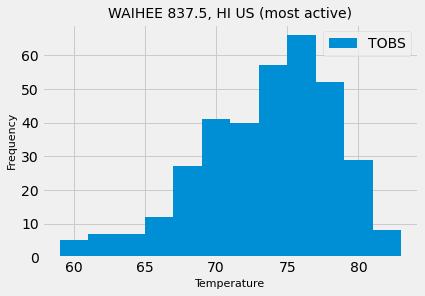

In [48]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp = session.query(measurement.date, measurement.tobs).\
    filter(measurement.station == mostActiveStation).filter(measurement.date >= lastYear).\
    group_by(measurement.date).all()
temp_df = pd.DataFrame(data=temp, columns=['date', 'tobs'])
temp_df = temp_df.set_index('date', drop=True)
plt.hist(temp_df['tobs'], 12)
plt.title(f'{mostActiveStationName} (most active)', fontsize=14)
plt.ylabel('Frequency', fontsize=11)
plt.xlabel('Temperature', fontsize=11)
plt.savefig('output/TempActiveStation_Last12m.png')
plt.legend(['TOBS'], loc='upper right')
plt.show()

## Bonus Challenge Assignment

In [49]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

NameError: name 'Measurement' is not defined

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
